In [1]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
plt.style.use('./deeplearning.mplstyle')

RANDOM_STATE = 42

In [2]:
df = pd.read_csv("sample2_spam_text.csv")

In [3]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Category'])

In [4]:
# Exclude the target column
features = [x for x in df.columns if x != 'Category']  # Exclude 'type' column
print(len(features))

8


In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.2, random_state=42)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 400
validation samples: 100
target proportion: 0.4900


In [6]:
# Building decision tree 
# min_samples_split: The minimum number of samples required to split an internal ndoe
# max_depth: The maximum depth of the tree
# An additionaly hyperparameter for Random Forest is called n_estimators, which is the 
# number of Decision Tress that make up the Random Forest

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

min_samples_split=2, Train Accuracy=1.0000, Validation Accuracy=0.8300
min_samples_split=10, Train Accuracy=0.9375, Validation Accuracy=0.8500
min_samples_split=30, Train Accuracy=0.9100, Validation Accuracy=0.8700
min_samples_split=50, Train Accuracy=0.8800, Validation Accuracy=0.8600
min_samples_split=100, Train Accuracy=0.8600, Validation Accuracy=0.8200
min_samples_split=200, Train Accuracy=0.8550, Validation Accuracy=0.8100
min_samples_split=300, Train Accuracy=0.8375, Validation Accuracy=0.8100
min_samples_split=700, Train Accuracy=0.5100, Validation Accuracy=0.4600


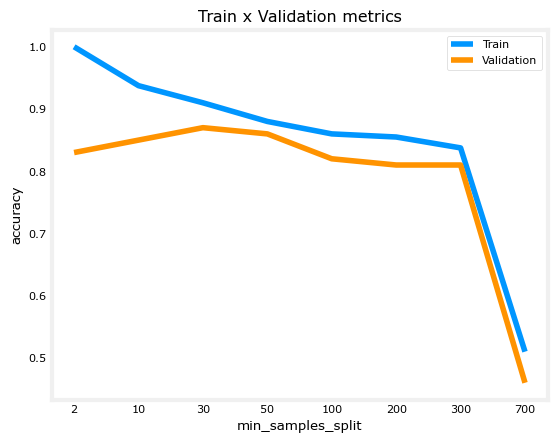

In [7]:
# Min Sample Split

accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:

    model = DecisionTreeClassifier(min_samples_split=min_samples_split,
                                   random_state=42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"min_samples_split={min_samples_split}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

max_depth=1, Train Accuracy=0.8375, Validation Accuracy=0.8100
max_depth=2, Train Accuracy=0.8550, Validation Accuracy=0.8100
max_depth=3, Train Accuracy=0.8825, Validation Accuracy=0.8500
max_depth=4, Train Accuracy=0.8850, Validation Accuracy=0.8600
max_depth=8, Train Accuracy=0.9600, Validation Accuracy=0.8500
max_depth=16, Train Accuracy=1.0000, Validation Accuracy=0.8300
max_depth=32, Train Accuracy=1.0000, Validation Accuracy=0.8300
max_depth=64, Train Accuracy=1.0000, Validation Accuracy=0.8300
max_depth=None, Train Accuracy=1.0000, Validation Accuracy=0.8300


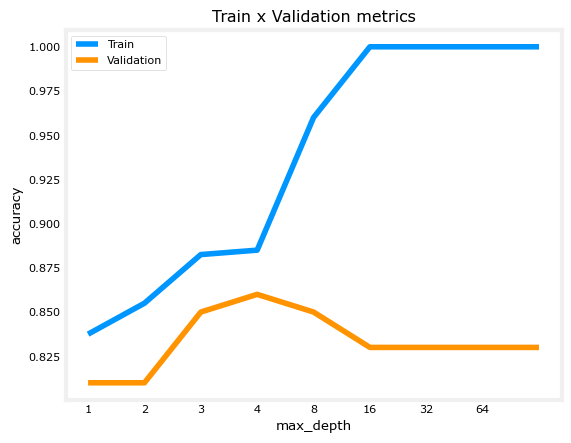

In [8]:
# Max depth 

accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:

    model = DecisionTreeClassifier(max_depth=max_depth,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"max_depth={max_depth}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train','Validation'])

n_estimators=10, Train Accuracy=0.9925, Validation Accuracy=0.8100
n_estimators=50, Train Accuracy=1.0000, Validation Accuracy=0.8300
n_estimators=100, Train Accuracy=1.0000, Validation Accuracy=0.8700
n_estimators=500, Train Accuracy=1.0000, Validation Accuracy=0.8900


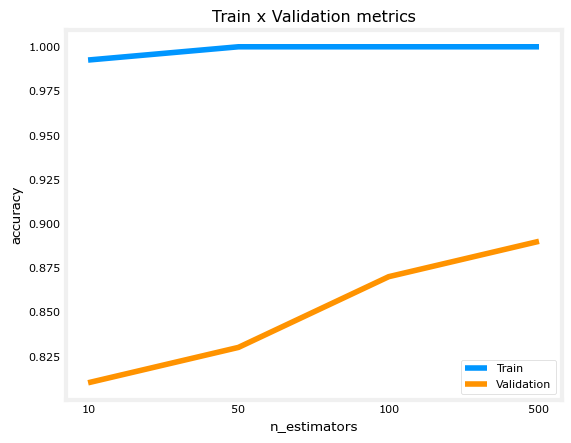

In [9]:
# N Estimators

accuracy_list_train = []
accuracy_list_val = []

for n_estimators in n_estimators_list:

    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"n_estimators={n_estimators}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [10]:
random_forest_model = RandomForestClassifier(min_samples_split = 10,
                                             max_depth = 3,
                                             n_estimators = 10).fit(X_train,y_train)

In [11]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.8475
Metrics test:
	Accuracy score: 0.8200


In [12]:
n = int(len(X_train)*0.8) 

In [13]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [14]:
# eval_set = [(X_train_eval,y_train_eval)]:Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets.
# early_stopping_rounds: This parameter helps to stop the model training if its evaluation metric is no longer improving on the validation set. It's set to 10.

# This code builds and trains a smart model to make predictions, and it tries to avoid overfitting by stopping early if the model stops improving.
# xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds = 15)
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.64302
[1]	validation_0-logloss:0.59886
[2]	validation_0-logloss:0.56466
[3]	validation_0-logloss:0.53326
[4]	validation_0-logloss:0.51085
[5]	validation_0-logloss:0.48717
[6]	validation_0-logloss:0.47104
[7]	validation_0-logloss:0.45521
[8]	validation_0-logloss:0.44219
[9]	validation_0-logloss:0.43426
[10]	validation_0-logloss:0.42543
[11]	validation_0-logloss:0.41832
[12]	validation_0-logloss:0.41512
[13]	validation_0-logloss:0.41002
[14]	validation_0-logloss:0.40502
[15]	validation_0-logloss:0.40547
[16]	validation_0-logloss:0.39704
[17]	validation_0-logloss:0.39492
[18]	validation_0-logloss:0.39326
[19]	validation_0-logloss:0.38618
[20]	validation_0-logloss:0.38694
[21]	validation_0-logloss:0.38838
[22]	validation_0-logloss:0.39047
[23]	validation_0-logloss:0.39349
[24]	validation_0-logloss:0.39480
[25]	validation_0-logloss:0.39453
[26]	validation_0-logloss:0.39404
[27]	validation_0-logloss:0.39437
[28]	validation_0-logloss:0.39877
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [15]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9625
Metrics test:
	Accuracy score: 0.8700


In [16]:
cm = confusion_matrix(y_test, xgb_model.predict(X_test))
print(cm)

[[40  6]
 [ 7 47]]


In [17]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        46
           1       0.89      0.87      0.88        54

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [18]:
cv_score = cross_val_score(xgb_model, X_test, y_test, cv=5)
print(f'Cross-Validation Score: {cv_score}')
print(f'Mean CV Score: {cv_score.mean()}')

Cross-Validation Score: [0.7  0.8  0.75 0.85 0.8 ]
Mean CV Score: 0.78


                  Feature  Importance
0             text_length       0.146
2         avg_word_length       0.076
1               num_words       0.040
4        num_exclamations       0.028
7  sentiment_subjectivity       0.018
3    num_suspicious_words       0.016
5           num_questions       0.010
6      sentiment_polarity       0.010


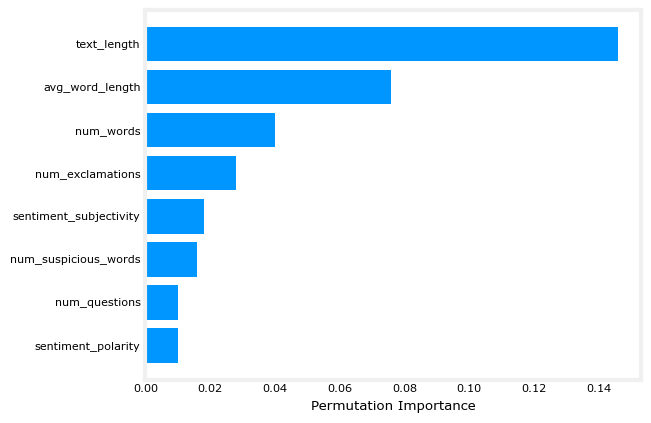

In [19]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, scoring="accuracy")

importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print(importance_df)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()